In [8]:
PROJECT_ROOT = "../"
import sys
# The following line adds the parent directory to the python path.
sys.path.insert(0, PROJECT_ROOT) 

In [19]:
from importlib import reload
import src.experiment.sample_utils as su
import src.experiment.experiment_utils as exp
import src.dataset_handling.pamap.write_pamap as wp
import src.experiment.dataset_experiments.pamap_experiments as p_exp

reload(su)
reload(exp)
reload(wp)
reload(p_exp)

<module 'src.experiment.dataset_experiments.pamap_experiments' from '/home/hphi344/Documents/GS-DBSCAN-Analysis/analysis_notebooks/../src/experiment/dataset_experiments/pamap_experiments.py'>

In [22]:
k = 5
m = 50

parquet_name = f"pamap_sample_results_k{k}_m{m}.parquet"

In [23]:
params = exp.RunParams(d=wp.PAMAP_DIM, D=1024, minPts=50, k=k, m=m, eps=0.04, alpha=1.2,
                        distancesBatchSize=1000, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)


results = p_exp.run_pamap_samples(params, parquet_name)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/samples/f16/pamap_sample_n100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__pamap_sample_n100000_f16_n100000_d51_D1024_mp50_k5_m50_e0.04.json --n 100000 --d 51 --D 1024 --minPts 50 --k 5 --m 50 --eps 0.04 --alpha 1.2 --distancesBatchSize 1000 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/samples/f16/pamap_sample_n100000_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__pamap_sample_n100000_f16_n100000_d51_

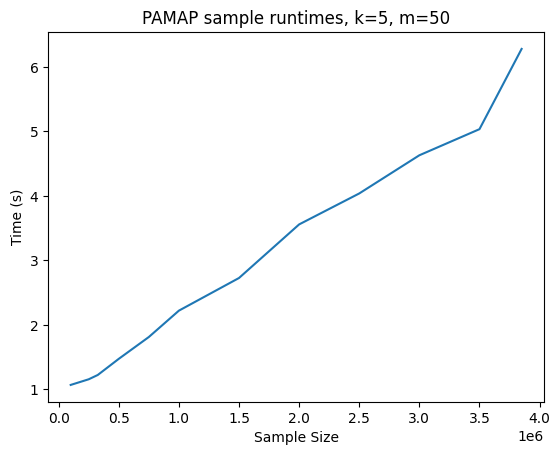

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.read_parquet(f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/samples/{parquet_name}.parquet")

fig, ax = su.plot_sample_time_results(results_df, save_path="PAMAP_sample_runtimes.png", title=f"PAMAP sample runtimes, k={k}, m={m}")
plt.show()


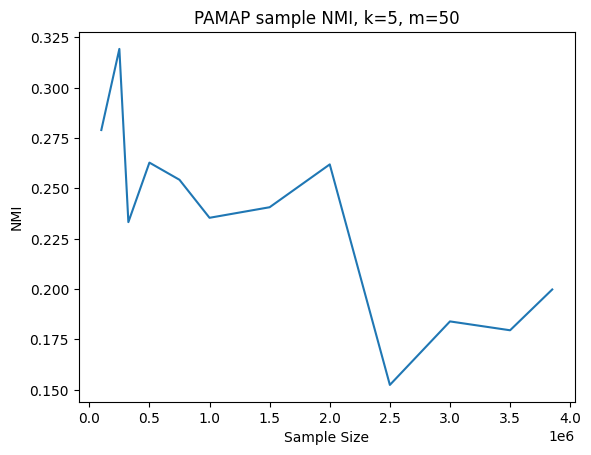

In [25]:
fig, ax = su.plot_sample_nmi_results(results_df, save_path="PAMAP_sample_nmi.png", title=f"PAMAP sample NMI, k={k}, m={m}")
plt.show()

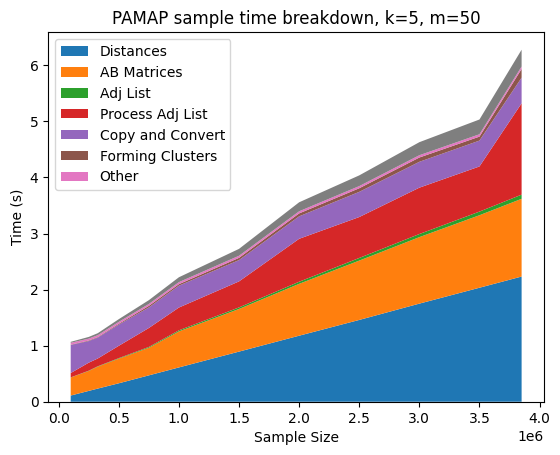

In [26]:
fig, ax = su.plot_sample_time_breakdown(results_df, save_file="PAMAP_sample_time_breakdown.png", title=f"PAMAP sample time breakdown, k={k}, m={m}")